What's this dataset's timestamp range?

In [3]:
import duckdb
import pandas as pd

con = duckdb.connect('db/ibm_aml.db')
c = con.execute("SELECT MAX(Timestamp), MIN(Timestamp) FROM demo;")

df = pd.DataFrame(c.fetchall(), columns = ['end_timestamp', 'start_timestamp'])
display(df)

,end_timestamp,start_timestamp
0,2023/01/12 16:49,2022/08/01 00:00


How many rows/records in this dataset? and How many of them are the records have is_laundering flag?

In [5]:
import duckdb
import pandas as pd
con = duckdb.connect('db/ibm_aml.db')
c = con.execute("SELECT Count(*), count(is_laundering) FILTER (WHERE is_laundering), count(is_laundering) FILTER (WHERE is_laundering)/Count(*) * 100 FROM demo;")

df = pd.DataFrame(c.fetchall(), columns = ['total_record', "is_laundering", "persentage"])
display(df)

,total_record,is_laundering,persentage
0,430920901,386163,0.089613


Lets focus on the is_laundering data. Whats the payment format based on the total amount paid? Showing in the bar structure.

total_paid,payment_format
f64,str
2.2740e13,"""ACH"""
6.2122e11,"""Cheque"""
5.2556e10,"""Cash"""
5.6701e8,"""Credit Card"""
1.4183e6,"""Bitcoin"""
32253.69,"""Wire"""


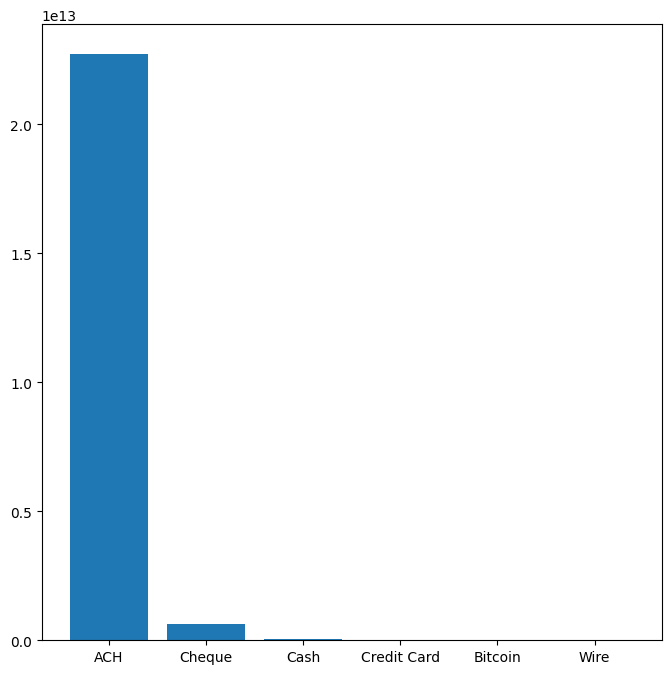

In [12]:
import duckdb
import polars as pl
import matplotlib.pyplot as plt

con = duckdb.connect('db/ibm_aml.db')
duckdb_to_arrow = con.query("""
  SELECT 
    ROUND(SUM(amount_paid), 2) as total_paid, 
    payment_format 
  FROM vw_is_laundering 
  GROUP BY payment_format 
  ORDER BY SUM(amount_paid) DESC;               
""").arrow()

polars_df = pl.DataFrame(duckdb_to_arrow)

display(polars_df)

# polars_df
plt.figure(figsize=(8,8))

# plot a Pie Chart for Registration Price column with label Car column
plt.bar(x=polars_df["payment_format"], height=polars_df["total_paid"])
plt.show()

plt.show()

# close connection
con.close()

What's the most laundering currency? showing in pie chart.

total_paid,payment_currency
f64,str
8.4865e12,"""Rupee"""
6.4202e12,"""Yen"""
4.5248e12,"""Ruble"""
1.2780e12,"""Yuan"""
7.4596e11,"""US Dollar"""
6.4494e11,"""Mexican Peso"""
4.9302e11,"""Euro"""
3.7528e11,"""Shekel"""
1.6231e11,"""Saudi Riyal"""


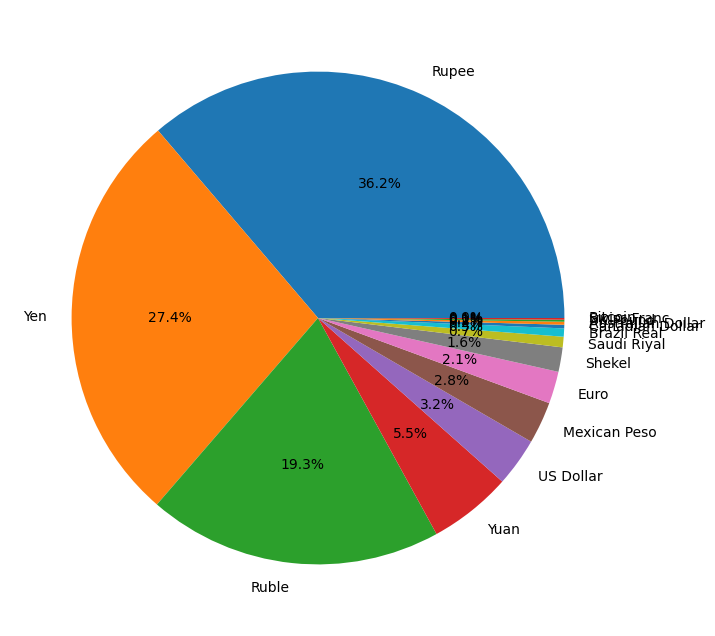

In [15]:
import duckdb
import polars as pl
import matplotlib.pyplot as plt

con = duckdb.connect('db/ibm_aml.db')
duckdb_to_arrow = con.query("""
SELECT ROUND(SUM(amount_paid), 2) as total_paid, payment_currency FROM vw_is_laundering GROUP BY payment_currency ORDER BY SUM(amount_paid) DESC;                  
""").arrow()
polars_df = pl.DataFrame(duckdb_to_arrow)

display(polars_df)

# polars_df
plt.figure(figsize=(8,8))

# plot a Pie Chart for Registration Price column with label Car column
plt.pie(polars_df["total_paid"], labels = polars_df["payment_currency"], autopct='%1.1f%%')
plt.show()

con.close()

### testing the Canada Open Data 

count,released
i64,str
2205,"""Not Yet Releas…"
8956,"""Released"""


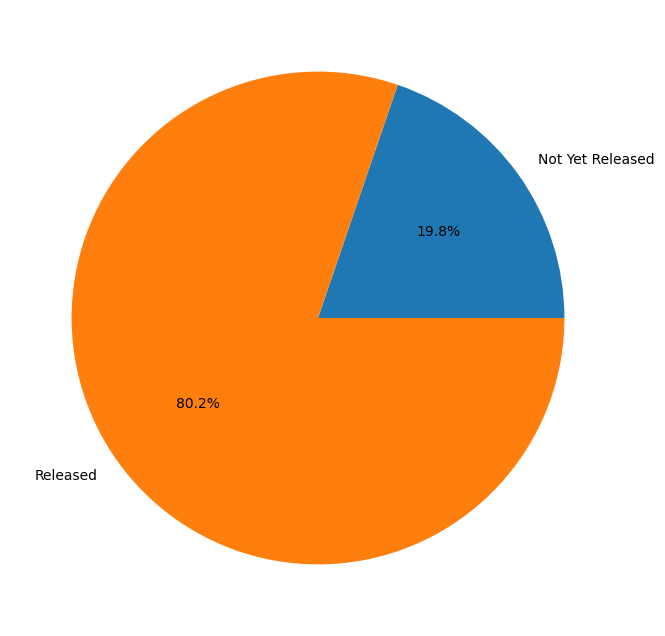

In [11]:
import duckdb
import polars as pl
import matplotlib.pyplot as plt

con = duckdb.connect('db/cdn_open_data.db')

duckdb_to_arrow = con.query("""
SELECT count(*) - count(date_released) as 'count', 'Not Yet Released' as released FROM inventory union select count(date_released), 'Released' as released from inventory;""").arrow()
polars_df = pl.DataFrame(duckdb_to_arrow)

display(polars_df)

# polars_df
plt.figure(figsize=(8,8))

# plot a Pie Chart for Registration Price column with label Car column
plt.pie(polars_df["count"], labels = polars_df["released"], autopct='%1.1f%%')
plt.show()

con.close()
